In [ ]:
import boto3

s3 = boto3.client("s3")

bucket = "lolhelper"
key    = "path/to/remote/file.csv"
local  = "data/file.csv"

s3.download_file(bucket, key, local)
print(f"{key} → {local}")

In [1]:
# Quick EDA on aggregated_stats.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('../aggregated_stats.csv')
print(f'Shape: {df.shape}')
df.head()

C:\Users\caleb\AppData\Local\Temp\ipykernel_2964\32971798.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Shape: (310, 265)


,champion_id,champion_name,team_position,total_games_played_in_role,total_games_per_champion,avg_kills,avg_deaths,avg_deaths_by_enemy_champs,avg_assists,avg_kill_participation,...,pct_of_matches_with_vision,pct_of_matches_with_spell_vamp,pct_of_matches_with_boots,pct_of_matches_with_aura,pct_of_matches_with_magic_penetration,pct_of_matches_with_cooldown_reduction,pct_of_matches_with_armor,pct_of_matches_with_health_regen,pct_of_matches_with_mana,pct_of_matches_with_nonboots_movement
0,18,Tristana,BOTTOM,19765,22191,7.841437,5.417050,5.398583,5.418265,0.472951,...,0.669910,16.704041,0.212961,0.001410,0.002821,0.070517,0.729145,0.548621,0.001410,19.976024
1,18,Tristana,MIDDLE,2284,22191,6.709720,5.612522,5.593257,4.324431,0.414998,...,0.604686,16.099773,0.806248,0.000000,0.012598,0.176367,0.869237,0.692870,0.000000,19.286974
2,26,Zilean,UTILITY,4116,5021,1.772595,4.638241,4.614674,13.801749,0.560299,...,39.115874,0.000000,5.953710,6.839324,0.327454,41.110367,9.064523,32.693310,7.070031,22.147801
3,26,Zilean,MIDDLE,716,5021,2.766760,3.621508,3.603352,10.705307,0.480971,...,2.444545,0.000000,4.708013,0.769579,1.177003,21.004980,1.629697,3.123585,36.441829,27.885921
4,27,Singed,TOP,5326,6100,4.029103,6.057454,5.680248,7.370259,0.388191,...,0.893526,5.939005,6.425896,0.599251,3.563403,13.627608,16.982343,2.974853,1.417871,17.421081


In [2]:
# Check for missing values
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

avg_supp_quest_completion_time                         253
total_games_completed_supp_quest_first                 252
avg_jungler_kills_early_jungle                         221
avg_jungler_early_kills_on_laners                      221
pct_of_games_with_highest_crowd_control_score           44
avg_kills_on_other_lanes_early_as_jungler               40
avg_times_had_early_takedowns_in_all_lanes_as_laner     40
pct_of_games_with_highest_damage_dealt                   4
avg_individual_solo_towers_kills_late_game               1
dtype: int64

In [3]:
df.fillna(0, inplace=True)

In [4]:
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [5]:
# Summary statistics for numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
champion_id,310.0,185.225806,244.929791,1.000000,41.250000,85.500000,166.000000,950.000000
total_games_played_in_role,310.0,4332.693548,4248.924568,119.000000,949.250000,3244.500000,6220.500000,24103.000000
total_games_per_champion,310.0,7789.316129,4244.269460,1401.000000,4657.750000,6802.000000,9482.000000,24548.000000
avg_kills,310.0,5.436452,1.791521,0.812132,4.322950,5.525270,6.722745,9.262436
avg_deaths,310.0,5.649780,0.731699,3.463319,5.164385,5.618687,6.056549,8.713043
...,...,...,...,...,...,...,...,...
pct_of_matches_with_cooldown_reduction,310.0,23.883527,17.323242,0.070517,10.423806,21.396872,34.460530,73.537397
pct_of_matches_with_armor,310.0,12.340699,14.695134,0.211193,2.481457,6.851132,14.842004,82.188841
pct_of_matches_with_health_regen,310.0,12.609252,15.161032,0.079618,0.940525,4.513059,26.847200,75.247871
pct_of_matches_with_mana,310.0,9.661627,13.747129,0.000000,0.094984,1.543989,19.038011,67.327586


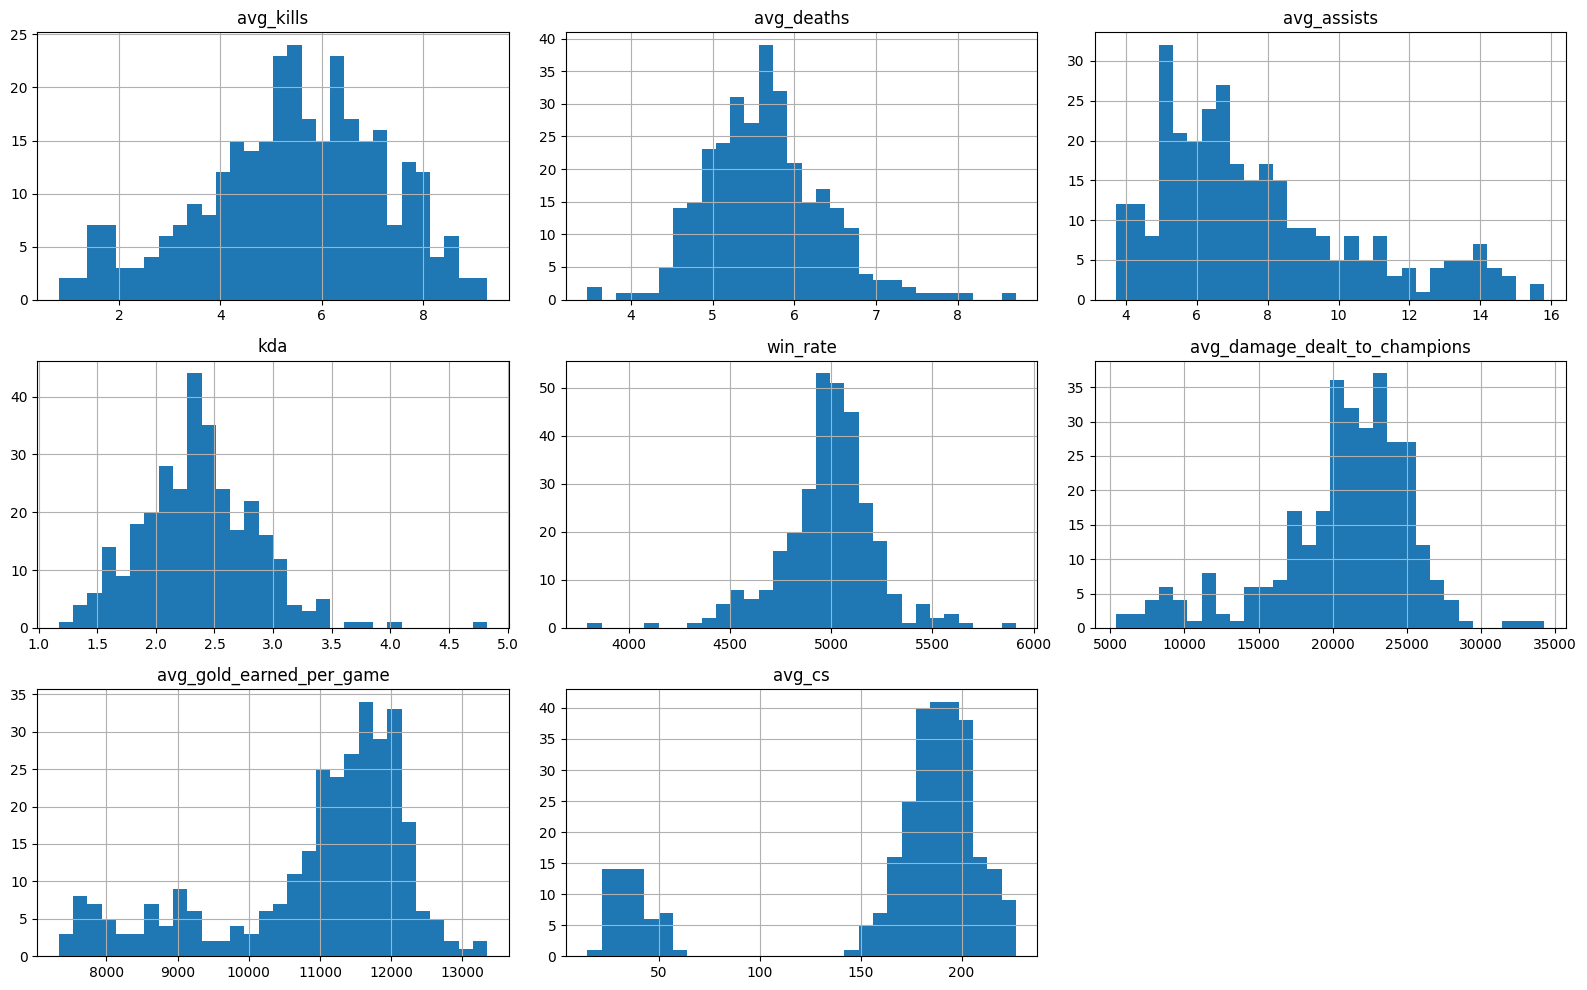

In [5]:
# Plot distributions of a few key features
features = ['avg_kills', 'avg_deaths', 'avg_assists', 'kda', 'win_rate', 'avg_damage_dealt_to_champions', 'avg_gold_earned_per_game', 'avg_cs']
df[features].hist(bins=30, figsize=(16, 10))
plt.tight_layout()
plt.show()

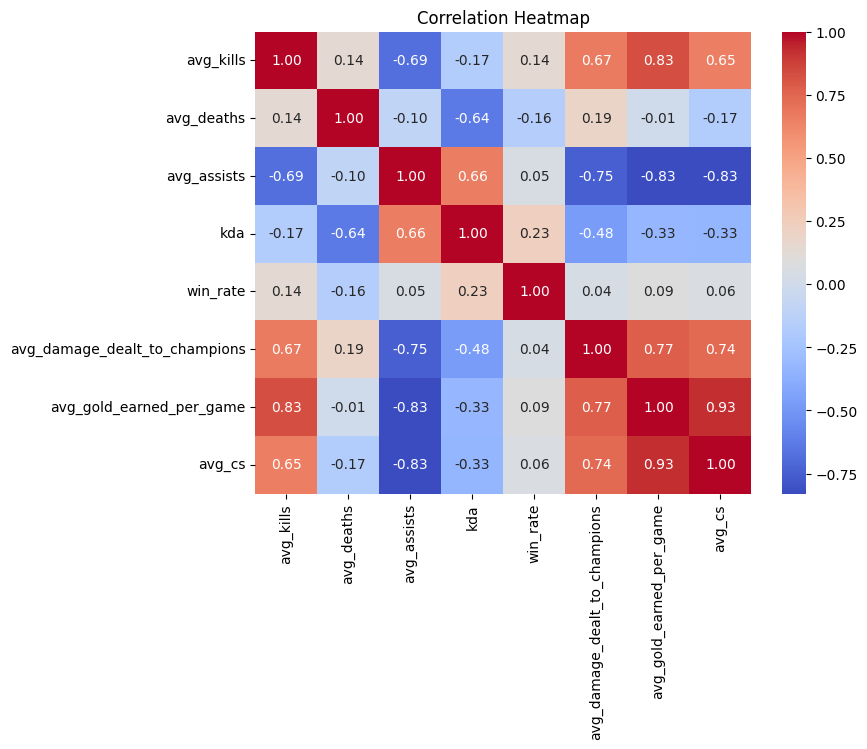

In [6]:
# Correlation heatmap for a subset of features
corr = df[features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [7]:
# List columns for feature selection
print('Columns:')
for i, col in enumerate(df.columns):
    print(f'{i}: {col}')

Columns:
0: champion_id
1: champion_name
2: team_position
3: total_games_played_in_role
4: total_games_per_champion
5: avg_kills
6: avg_deaths
7: avg_deaths_by_enemy_champs
8: avg_assists
9: avg_kill_participation
10: avg_takedowns
11: total_wins
12: pct_of_games_with_highest_damage_dealt
13: avg_pct_damage_dealt_in_team
14: average_damage_per_minute
15: avg_damage_dealt_to_champions
16: avg_total_damage_dealt
17: avg_magic_damage_dealt_to_champions
18: avg_total_magic_damage_dealt
19: avg_physical_damage_dealt_to_champions
20: avg_total_physical_damage_dealt
21: avg_true_damage_dealt_to_champions
22: avg_total_true_damage_dealt
23: avg_largest_critical_strike
24: avg_pct_damage_taken_in_team
25: avg_damage_taken
26: avg_magic_damage_taken
27: avg_physical_damage_taken
28: avg_true_damage_taken
29: avg_damage_self_mitigated
30: avg_times_killed_champ_took_full_team_damage_and_survived
31: avg_times_survived_single_digit_hp
32: avg_times_survived_three_immobilizes_in_fight
33: avg_times


=== Clustering for role: BOTTOM ===


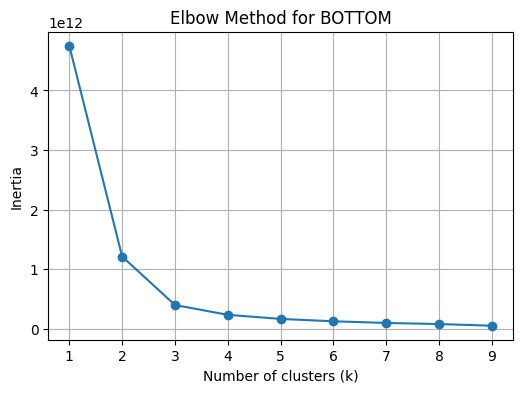


  Cluster 0 (7 champions):
Tristana
 Caitlyn
    Jinx
  Lucian
  Ezreal
    Jhin
   Kaisa

  Cluster 1 (13 champions):
     Twitch
MissFortune
       Ashe
      Sivir
      Xayah
   Aphelios
      Corki
    Smolder
      Varus
     Draven
     Samira
      Vayne
       Zeri

  Cluster 2 (18 champions):
       Brand
  Cassiopeia
      Viktor
     Kalista
Heimerdinger
     Karthus
       Swain
       Nilah
        Hwei
       Ziggs
      KogMaw
 AurelionSol
         Lux
   Seraphine
       Yasuo
         Mel
        Zyra
      Veigar

=== Clustering for role: MIDDLE ===


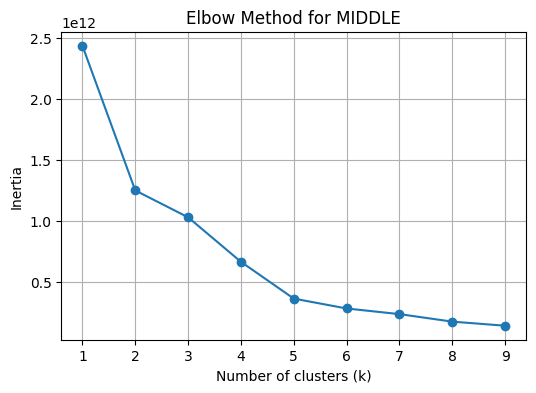


  Cluster 0 (58 champions):
    Tristana
      Zilean
      Singed
       Brand
  Cassiopeia
        Sion
    Malphite
      Gragas
      Xerath
      Qiyana
      Anivia
   Gangplank
Heimerdinger
       Jayce
      Aurora
    Kassadin
       Quinn
     Karthus
       Corki
       Swain
        Hwei
       Annie
     Smolder
       Ziggs
      KogMaw
  Tryndamere
 AurelionSol
      Akshan
        Nunu
       Karma
    Pantheon
       Kayle
         Lux
     Ambessa
       Neeko
       Garen
         Zac
      Irelia
        Shen
      Kennen
         Vex
     Morgana
     Naafiri
   Seraphine
         Zoe
        Kled
        Fizz
       Diana
        Azir
       Talon
        Ryze
      Velkoz
      Veigar
      Rumble
       Nasus
   Lissandra
    Renekton
      KSante

  Cluster 1 (18 champions):
    Orianna
       Yone
      Galio
     Viktor
        Zed
    Leblanc
   Katarina
   Vladimir
   Malzahar
      Akali
    Chogath
     Syndra
       Ekko
      Yasuo
      Sylas
TwistedF

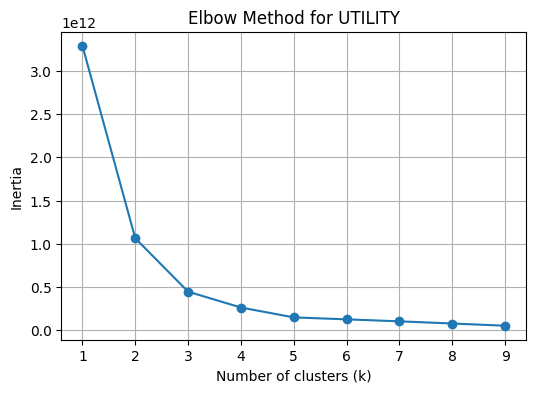


  Cluster 0 (15 champions):
      Sona
   Alistar
     Senna
     Yuumi
     Milio
      Pyke
       Lux
     Leona
      Bard
     Braum
     Rakan
     Janna
    Soraka
Blitzcrank
      Rell

  Cluster 1 (5 champions):
    Lulu
  Thresh
   Karma
Nautilus
    Nami

  Cluster 2 (37 champions):
      Zilean
       Brand
       Galio
       Teemo
        Ashe
      Xerath
       Ivern
     Leblanc
      Anivia
      Rammus
   TahmKench
Heimerdinger
       Swain
        Hwei
       Annie
       Shaco
      Maokai
       Amumu
    Pantheon
       Neeko
         Zac
        Shen
       Elise
      Renata
     Morgana
     Nidalee
   Seraphine
       Sylas
         Zoe
 TwistedFate
         Mel
       Taric
        Zyra
      Velkoz
      Veigar
       Poppy
FiddleSticks

=== Clustering for role: TOP ===


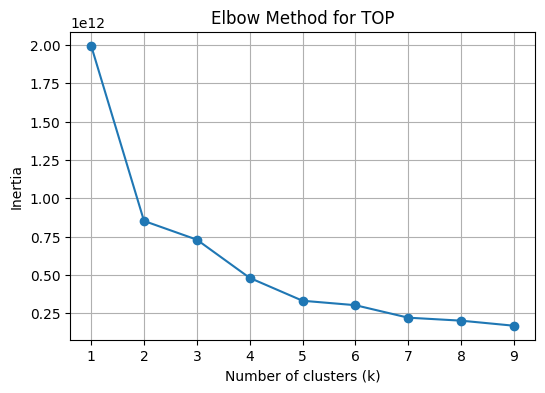


  Cluster 0 (35 champions):
  Cassiopeia
       Galio
     Sejuani
     Kalista
        Udyr
      Anivia
        Kayn
      Rammus
   TahmKench
      Aurora
  MonkeyKing
       Quinn
     XinZhao
       Swain
      RekSai
     Smolder
       Varus
      Maokai
      Akshan
      Illaoi
        Olaf
         Zac
     Nidalee
     Shyvana
     Trundle
       Vayne
       Yasuo
       Sylas
       Briar
        Kled
        Azir
     Skarner
       Poppy
      Rengar
FiddleSticks

  Cluster 1 (26 champions):
       Yone
       Sion
   Malphite
       Gnar
     Yorick
     Darius
  Gangplank
      Jayce
Mordekaiser
      Fiora
 Tryndamere
   Pantheon
    Ambessa
      Garen
     Irelia
    Camille
       Sett
       Gwen
      Riven
      Urgot
    DrMundo
      Nasus
   Renekton
        Jax
     Aatrox
     KSante

  Cluster 2 (15 champions):
      Singed
     Warwick
       Teemo
      Gragas
Heimerdinger
    Vladimir
       Akali
       Kayle
     Chogath
        Ornn
        Shen
   

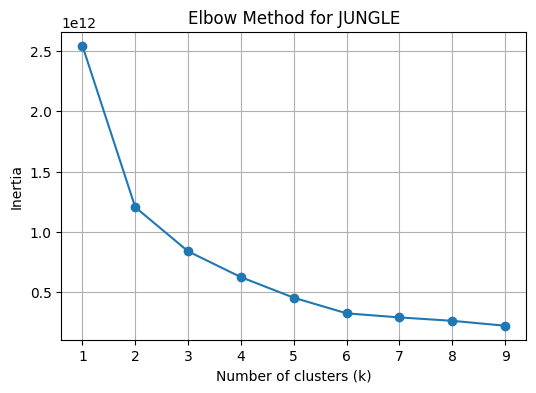


  Cluster 0 (25 champions):
    Nocturne
     Warwick
        Udyr
      Darius
     Belveth
  MonkeyKing
     XinZhao
      Lillia
    MasterYi
       Shaco
      Graves
        Nunu
       Amumu
    Pantheon
    Volibear
     Kindred
        Ekko
        Gwen
       Briar
          Vi
      LeeSin
       Diana
       Talon
      Rengar
FiddleSticks

  Cluster 1 (31 champions):
      Brand
    Sejuani
      Teemo
     Gragas
        Zed
     Yorick
      Ivern
     Qiyana
    Evelynn
     Rammus
Mordekaiser
    Karthus
     RekSai
     Maokai
    Ambessa
       Olaf
      Neeko
        Zac
      Elise
    Morgana
    Nidalee
    Shyvana
    Trundle
    Taliyah
       Zyra
    DrMundo
     Rumble
      Nasus
    Skarner
      Poppy
        Jax

  Cluster 2 (6 champions):
   Viego
JarvanIV
    Kayn
  Khazix
 Hecarim
 Naafiri


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

label_cols = ['champion_id', 'champion_name', 'team_position']

for role in df['team_position'].unique():
    print(f"\n=== Clustering for role: {role} ===")
    df_role = df[df['team_position'] == role].reset_index(drop=True)
    
    # Exclude label columns
    feature_cols = [col for col in df_role.columns if col not in label_cols]
    X = df_role[feature_cols]
    
    # One-hot encode categorical columns
    cat_cols = X.select_dtypes(include=['object', 'category']).columns
    X_encoded = pd.get_dummies(X, columns=cat_cols)
    
    # Elbow method
    inertia = []
    k_range = range(1, min(10, len(df_role)))  # Don't exceed number of samples
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_encoded)
        inertia.append(kmeans.inertia_)
    
    plt.figure(figsize=(6, 4))
    plt.plot(k_range, inertia, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title(f'Elbow Method for {role}')
    plt.xticks(k_range)
    plt.grid(True)
    plt.show()
    
    # Choose a number of clusters (e.g., 3, or prompt user to pick based on elbow)
    n_clusters = 3 if len(df_role) >= 3 else 1
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df_role['cluster'] = kmeans.fit_predict(X_encoded)
    
    # List all champions in each cluster for this role
    for cluster_num in sorted(df_role['cluster'].unique()):
        members = df_role[df_role['cluster'] == cluster_num][['champion_name']]
        print(f"\n  Cluster {cluster_num} ({len(members)} champions):")
        print(members['champion_name'].to_string(index=False))

In [16]:
import numpy as np
import pandas as pd

for role in df['team_position'].unique():
    print(f"\n=== Feature Impact for role: {role} ===")
    df_role = df[df['team_position'] == role].reset_index(drop=True)
    feature_cols = [col for col in df_role.columns if col not in label_cols]
    X = df_role[feature_cols]
    cat_cols = X.select_dtypes(include=['object', 'category']).columns
    X_encoded = pd.get_dummies(X, columns=cat_cols)
    
    n_clusters = 3 if len(df_role) >= 3 else 1
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_encoded)
    
    # Calculate feature importance as the range of centroid values for each feature
    centroids = kmeans.cluster_centers_
    feature_importance = np.ptp(centroids, axis=0)  # ptp = max - min (range)
    importance_df = pd.DataFrame({
        'feature': X_encoded.columns,
        'importance': feature_importance
    }).sort_values(by='importance', ascending=False)
    
    print(importance_df.head(10).to_string(index=False))  # Show top 10 features


=== Feature Impact for role: BOTTOM ===
                                  feature    importance
                               total_wins 906475.396825
          avg_total_physical_damage_dealt 105706.914657
             avg_total_magic_damage_dealt  93759.387596
               total_games_played_in_role  18359.468254
pct_of_games_played_champ_select_position  17736.198413
      avg_magic_damage_dealt_to_champions  17207.225131
   avg_physical_damage_dealt_to_champions  15490.323834
                   avg_total_damage_dealt  14654.113762
                 total_games_per_champion  14184.920635
              avg_total_true_damage_dealt   4620.158284

=== Feature Impact for role: MIDDLE ===
                                  feature    importance
                               total_wins 724013.793103
          avg_total_physical_damage_dealt  40960.208955
              avg_total_true_damage_dealt  36508.655058
             avg_total_magic_damage_dealt  22170.705802
               total_g

In [10]:
import pandas as pd
from sklearn.cluster import KMeans

# 1. Exclude label columns
label_cols = ['champion_id', 'champion_name', 'team_position']
feature_cols = [col for col in df.columns if col not in label_cols]

# 2. Select features
X = df[feature_cols]

# 3. One-hot encode all categorical columns (object or category dtype)
X_encoded = pd.get_dummies(X)

# 4. Clustering
n_clusters = 25  # Adjust as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X_encoded)

# 5. Show results with labels and cluster assignment
df[['champion_id', 'champion_name', 'team_position', 'cluster']].head(100)

,champion_id,champion_name,team_position,cluster
0,18,Tristana,BOTTOM,15
1,18,Tristana,MIDDLE,7
2,26,Zilean,UTILITY,18
3,26,Zilean,MIDDLE,22
4,27,Singed,TOP,10
...,...,...,...,...
95,8,Vladimir,MIDDLE,10
96,38,Kassadin,MIDDLE,0
97,62,MonkeyKing,TOP,7
98,62,MonkeyKing,JUNGLE,1


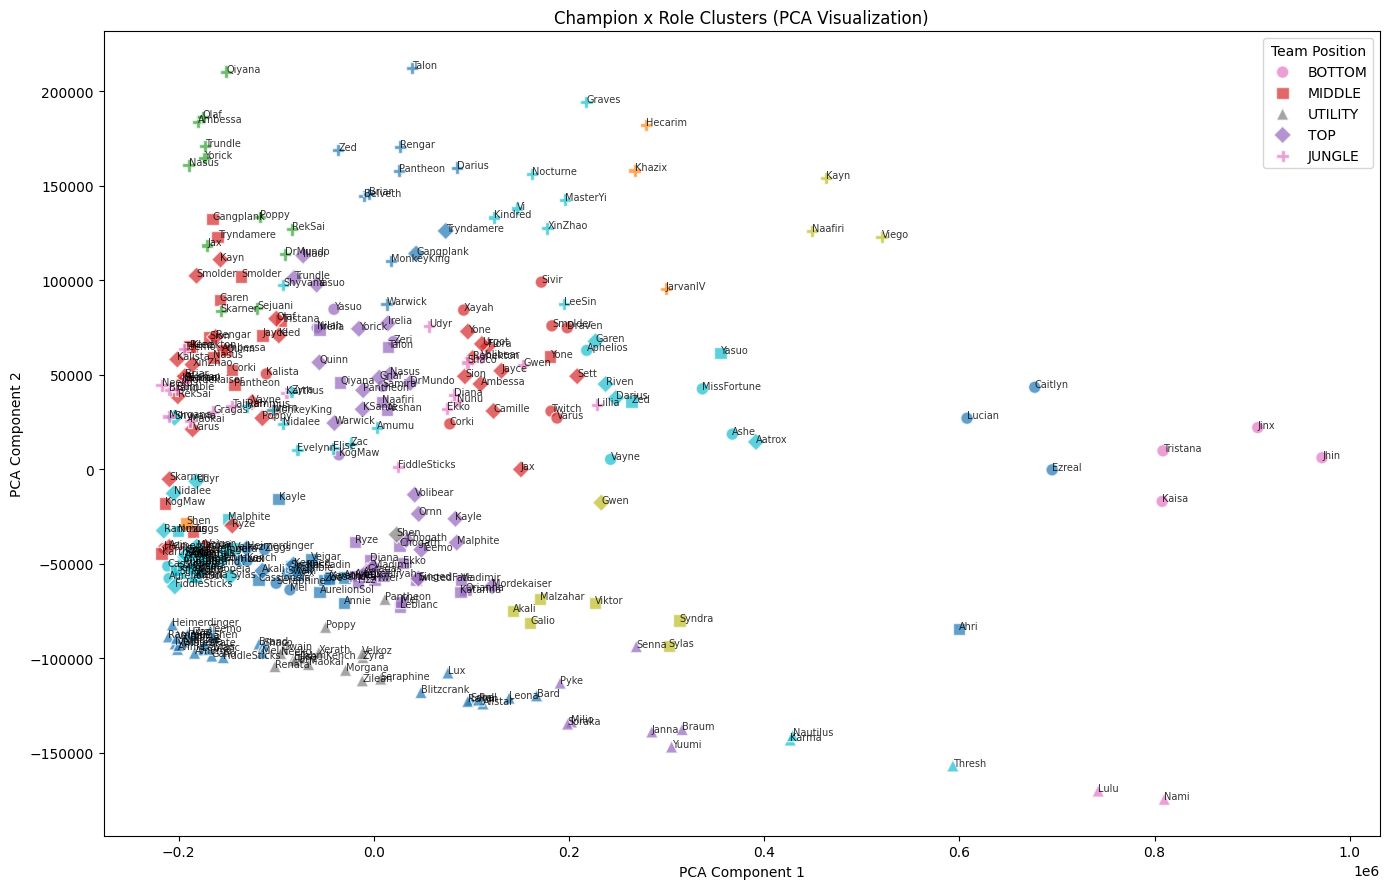

In [13]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Reduce to 2D for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_encoded)

# Define marker styles for each team position
team_positions = df['team_position'].unique()
markers = ['o', 's', '^', 'D', 'P', 'X', '*', 'v', '<', '>']  # Add more if needed
marker_dict = {pos: markers[i % len(markers)] for i, pos in enumerate(team_positions)}

plt.figure(figsize=(14, 9))

for pos in team_positions:
    idx = df['team_position'] == pos
    plt.scatter(
        X_pca[idx, 0], X_pca[idx, 1],
        c=df.loc[idx, 'cluster'],
        cmap='tab10',
        marker=marker_dict[pos],
        label=pos,
        alpha=0.7,
        edgecolors='w',
        s=80
    )
    # Add champion name labels for this team position
    for i in np.where(idx)[0]:
        plt.text(
            X_pca[i, 0], X_pca[i, 1],
            df.iloc[i]['champion_name'],
            fontsize=7, alpha=0.8
        )

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Champion x Role Clusters (PCA Visualization)')
plt.legend(title='Team Position')
plt.tight_layout()
plt.show()

In [14]:
# List all champion-role combos in each cluster
for cluster_num in sorted(df['cluster'].unique()):
    members = df[df['cluster'] == cluster_num][['champion_name', 'team_position']]
    print(f"\nCluster {cluster_num} ({len(members)} members):")
    print(members.to_string(index=False))


Cluster 0 (22 members):
champion_name team_position
   Cassiopeia        MIDDLE
       Xerath        MIDDLE
       Anivia        MIDDLE
 Heimerdinger           TOP
     Kassadin        MIDDLE
        Swain        BOTTOM
        Swain        MIDDLE
         Hwei        BOTTOM
        Annie        MIDDLE
        Ziggs        BOTTOM
  AurelionSol        MIDDLE
        Akali           TOP
        Kayle        MIDDLE
          Lux        BOTTOM
       Kennen           TOP
          Vex        MIDDLE
    Seraphine        BOTTOM
          Zoe        MIDDLE
          Mel        BOTTOM
       Veigar        MIDDLE
       Rumble           TOP
    Lissandra        MIDDLE

Cluster 1 (11 members):
champion_name team_position
      Warwick        JUNGLE
          Zed        JUNGLE
       Darius        JUNGLE
      Belveth        JUNGLE
    Gangplank           TOP
   MonkeyKing        JUNGLE
   Tryndamere           TOP
     Pantheon        JUNGLE
        Briar        JUNGLE
        Talon        JUNGL